In [193]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.graph_objects as go
import folium


In [231]:
df = pd.read_excel('Covid cases in India.xlsx')

In [232]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0


## Data Cleaning

###  A few things about this data need to be cleaned up. There are two serial number columns, let's drop the first one. 

In [233]:
df = df.drop(['S. No.'], axis=1)

### Let's combine the total deaths in each state regardless of their nationality

In [234]:
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [235]:
df = df.drop(['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'], axis=1)

In [236]:
df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])

In [237]:
df.shape

(26, 5)

In [238]:
df

,Name of State / UT,Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,1,0,12,11
1,Chhattisgarh,0,0,6,6
2,Delhi,6,1,39,32
3,Gujarat,0,3,43,40
4,Haryana,11,0,30,19
5,Himachal Pradesh,0,1,4,3
6,Karnataka,3,2,20,15
7,Kerala,11,0,138,127
8,Madhya Pradesh,0,1,23,22
9,Maharashtra,15,4,147,128


In [239]:
## data cleaning done

## Q.1 Which Indian states are affected the most by Corona Virus?

In [240]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,1,0,12,11
1,Chhattisgarh,0,0,6,6
2,Delhi,6,1,39,32
3,Gujarat,0,3,43,40
4,Haryana,11,0,30,19
5,Himachal Pradesh,0,1,4,3
6,Karnataka,3,2,20,15
7,Kerala,11,0,138,127
8,Madhya Pradesh,0,1,23,22
9,Maharashtra,15,4,147,128


In [241]:
total_active_cases = df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()

#### colored grading from most to least affected

In [242]:
total_active_cases.style.background_gradient(cmap='Reds')

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


## Q. 2 Visalize the distribution of all active corona cases across all states

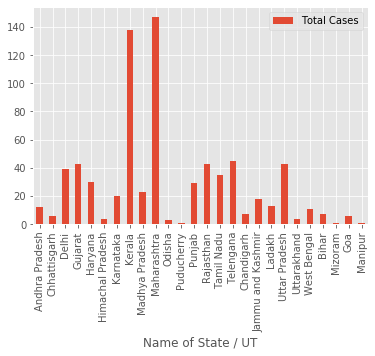

In [243]:
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()

### A picture is worth a thousand words, but a map is worth a thousand.

In [244]:
### Merging two different data frames to get the lat

In [245]:
Indian_Cord=pd.read_excel("Indian Coordinates.xlsx")


In [246]:
df=pd.merge(Indian_Cord,df,on='Name of State / UT')


In [247]:
df

,Name of State / UT,Latitude,Longitude,Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,1,0,12,11
1,Delhi,28.669993,77.230004,6,1,39,32
2,Haryana,28.450006,77.019991,11,0,30,19
3,Karnataka,12.570381,76.919997,3,2,20,15
4,Kerala,8.900373,76.569993,11,0,138,127
5,Maharashtra,19.250232,73.160175,15,4,147,128
6,Punjab,31.519974,75.980003,0,1,29,28
7,Rajasthan,26.449999,74.639981,3,0,43,40
8,Telengana,18.112400,79.019300,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,1,1,35,33


In [248]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df['Latitude'],df['Longitude'],df['Total Cases'],df['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.4,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)


In [249]:
map

In [177]:
dbd_India=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="India")
dbd_Korea=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel("per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")


In [178]:
# dbd=pd.read_excel("per_day_cases.xlsx",parse_dates=True)


In [179]:
# dbd

## Q. 4 Compare the growth of total active cases across different countries over the same period of time

In [215]:
from plotly.subplots import make_subplots

In [216]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')


## Q.5 Visualize the number of total corona cases throughout the world

In [217]:
df=pd.read_csv("covid_19_data.csv",parse_dates=['Last Update'])

In [218]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

In [219]:
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [220]:
### Answer to that question

In [221]:
### Direct co relation of cases with dates

In [222]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()
rec=df.groupby('Date').sum()['Recovered'].reset_index()

## Statistical co-relation

In [223]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))

fig.add_trace(go.Scatter(x=death['Date'],y=death['Deaths'],mode='lines+markers',name='Deaths',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=rec['Date'],y=rec['Recovered'],mode='lines+markers',name='Recovered',line=dict(color='green',width=2)))
